In [1]:
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import numpy as np
from PIL import Image
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
#the running of this seperate file needs the revision of relative path
train_label_path = './Datasets/cartoon_set/labels.csv'
train_img_path = './Datasets/cartoon_set/img/'
test_label_path = './Datasets/cartoon_set_test/labels.csv'
test_img_path = './Datasets/cartoon_set_test/img/'

#define the image data preprocessing including resize and conversion to L
def loadImage(path):
    img = Image.open(path)
    img = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR)
    median = cv2.resize(img, (64, 64))
    img_resize = Image.fromarray(cv2.cvtColor(median,cv2.COLOR_BGR2RGB))
    img = img_resize.convert("L")
    data = img.getdata()
    return data

#load train data
dataset = pd.read_csv(train_label_path, sep = "\t")  # read csv file
y_train = dataset['face_shape']
img_name1 = dataset['file_name']

x_train = []
for name in img_name1:
    img_path = train_img_path + name 
    img = loadImage(img_path)
    x_train.append(img)  

# Load test data
data_test = pd.read_csv(test_label_path, sep = "\t")  # read csv file
y_test = data_test['face_shape']
img_name2 = data_test['file_name']

x_test = []
for name in img_name2:
    img_path = test_img_path + name  # get path based on image name
    img = loadImage(img_path)
    x_test.append(img)  # add pic to x_test

print("Dataset prepared")

In [3]:
# GridSearchCV
'''
param_test1 = {'n_estimators':range(110,161,10), 'max_depth':range(9,14,2), 'min_samples_split':range(3,6,2)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(
                                  min_samples_leaf=20,max_features='sqrt', oob_score=True, random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x_train,y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_
'''

"\nparam_test1 = {'n_estimators':range(110,161,10), 'max_depth':range(9,14,2), 'min_samples_split':range(3,6,2)}\ngsearch1 = GridSearchCV(estimator = RandomForestClassifier(\n                                  min_samples_leaf=20,max_features='sqrt', oob_score=True, random_state=10), \n                       param_grid = param_test1, scoring='roc_auc',cv=5)\ngsearch1.fit(x_train,y_train)\ngsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_\n"

In [ ]:
#define the random forest classifier
clf=RandomForestClassifier(n_estimators=140,max_depth=13,min_samples_split=3)

#Train the model using the training sets
clf.fit(x_train,y_train)

# Cross-validation
'''
for q in range(0,10,1):
    test_size=[0.8,0.6,0.4,0.2,0.05]
    size=test_size[q]
    print("test_size = ",size)
    for p in range(3):
        x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size=size)
        clf.fit(x_train_split,y_train_split)
        y_pred = clf.predict(x_val)
        y_pred_training = clf.predict(x_train_split)
        print('Accuracy Score on train data: ', accuracy_score(y_true=y_train_split, y_pred=y_pred_training))
        print('Accuracy Score on test data: ', accuracy_score(y_true=y_val, y_pred=y_pred))
'''

In [ ]:
# prediction on test set
y_pred=clf.predict(x_test)

print("Random Forest test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))#text report showing the main classification metrics

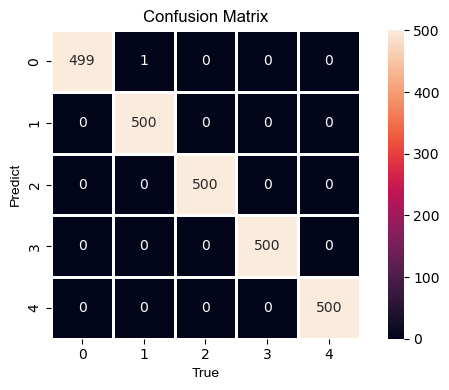

In [5]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)
fig, ax = plt.subplots(figsize=(6,4)) 
ax = sns.heatmap(df_cm, 
                annot=True, 
                fmt=".20g", 
                linewidths=2, 
                square=True
                )

ax.set_xlabel('True', family='Arial')
ax.set_ylabel('Predict', family='Arial')
ax.set_title('Confusion Matrix', family='Arial')
plt.tight_layout()
plt.savefig('B1_RF.png', dpi=300)